In [10]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6

In [11]:
data = pd.read_csv('Train_SU63ISt.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)
data.index

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2

 Data Types:
ID           int64
Datetime    object
Count        int64
dtype: object


RangeIndex(start=0, stop=18288, step=1)

In [12]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y %H:%M')
data = pd.read_csv('Train_SU63ISt.csv', parse_dates=['Datetime'], index_col='Datetime',date_parser=dateparse)
del data['ID']
print (data)


                     Count
Datetime                  
2012-08-25 00:00:00      8
2012-08-25 01:00:00      2
2012-08-25 02:00:00      6
2012-08-25 03:00:00      2
2012-08-25 04:00:00      2
2012-08-25 05:00:00      2
2012-08-25 06:00:00      2
2012-08-25 07:00:00      2
2012-08-25 08:00:00      6
2012-08-25 09:00:00      2
2012-08-25 10:00:00      2
2012-08-25 11:00:00      6
2012-08-25 12:00:00      4
2012-08-25 13:00:00      2
2012-08-25 14:00:00      6
2012-08-25 15:00:00      2
2012-08-25 16:00:00      2
2012-08-25 17:00:00      2
2012-08-25 18:00:00      2
2012-08-25 19:00:00      2
2012-08-25 20:00:00      2
2012-08-25 21:00:00      6
2012-08-25 22:00:00      2
2012-08-25 23:00:00      2
2012-08-26 00:00:00      4
2012-08-26 01:00:00      6
2012-08-26 02:00:00      2
2012-08-26 03:00:00      4
2012-08-26 04:00:00      2
2012-08-26 05:00:00      2
...                    ...
2014-09-24 18:00:00    966
2014-09-24 19:00:00   1178
2014-09-24 20:00:00   1008
2014-09-24 21:00:00    936
2

In [13]:
ts = data['Count']

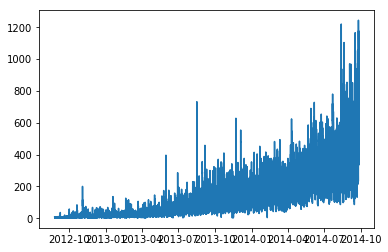

In [14]:
plt.plot(ts)

In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = ts.rolling(12).mean()
    rolstd = ts.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

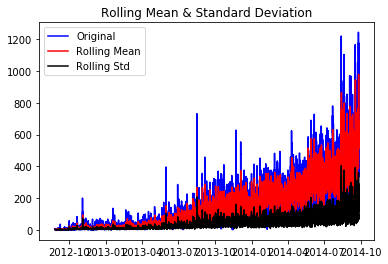

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (5%)               -2.861698
Critical Value (1%)               -3.430709
Critical Value (10%)              -2.566854
dtype: float64


In [16]:
test_stationarity(ts)
# moving_avg = ts_log.rolling(12).mean()

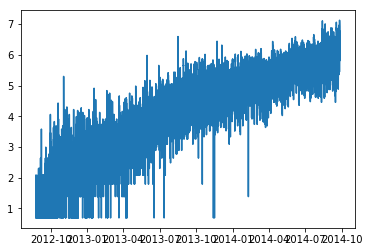

In [17]:
# By Rolling Mean Test, we can see that this time-series is not stationary
# But by Dickey - Fuller Test, our result comes out to be stationary.
ts_log = np.log(ts)
plt.plot(ts_log)

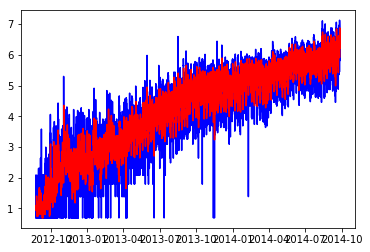

In [18]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log, color = 'blue')
plt.plot(moving_avg, color='red')

In [19]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)


Datetime
2012-08-25 00:00:00         NaN
2012-08-25 01:00:00         NaN
2012-08-25 02:00:00         NaN
2012-08-25 03:00:00         NaN
2012-08-25 04:00:00         NaN
2012-08-25 05:00:00         NaN
2012-08-25 06:00:00         NaN
2012-08-25 07:00:00         NaN
2012-08-25 08:00:00         NaN
2012-08-25 09:00:00         NaN
2012-08-25 10:00:00         NaN
2012-08-25 11:00:00    0.708435
Name: Count, dtype: float64

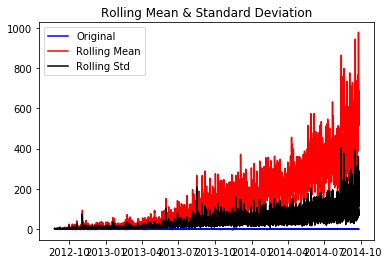

Results of Dickey-Fuller Test:
Test Statistic                   -24.228718
p-value                            0.000000
#Lags Used                        45.000000
Number of Observations Used    18231.000000
Critical Value (5%)               -2.861699
Critical Value (1%)               -3.430709
Critical Value (10%)              -2.566854
dtype: float64


In [20]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [21]:
# By Rolling Mean Test, we can see that this time-series is not stationary
# But by Dickey - Fuller Test, our result comes out to be stationary.

In [22]:
# Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

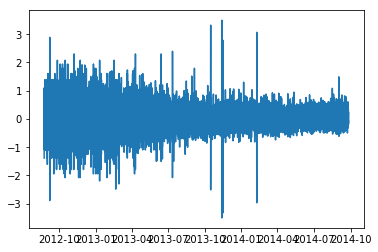

In [23]:
# Differencing
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)


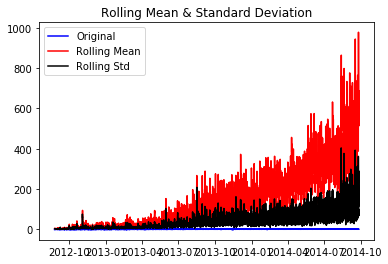

Results of Dickey-Fuller Test:
Test Statistic                   -32.041628
p-value                            0.000000
#Lags Used                        45.000000
Number of Observations Used    18241.000000
Critical Value (5%)               -2.861698
Critical Value (1%)               -3.430709
Critical Value (10%)              -2.566854
dtype: float64


In [25]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [26]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [27]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,u'Autocorrelation Function')

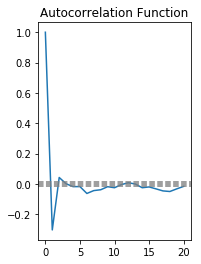

In [28]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:

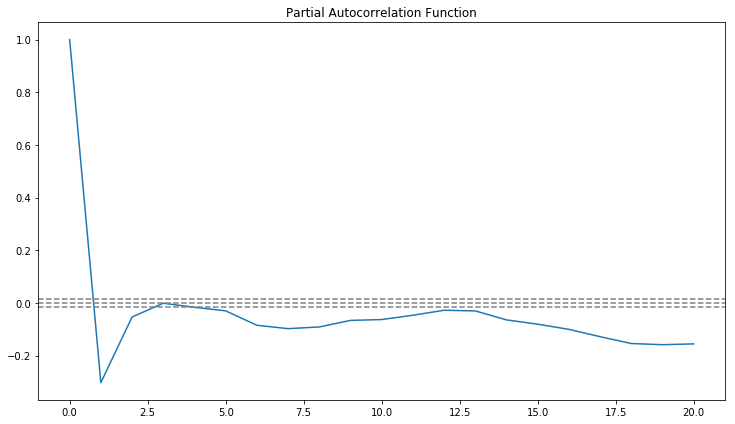

In [59]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [60]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\Shrey\Anaconda2\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Shrey\Anaconda2\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Shrey\Anaconda2\envs\py36\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Shrey\Anaconda2\envs\py36\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead o

Text(0.5,1,'RSS: 2710.3534')

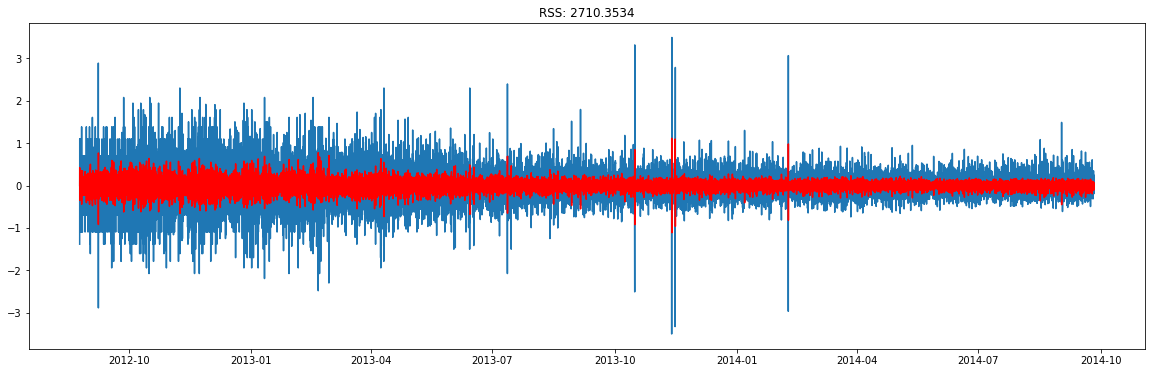

In [61]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\Shrey\Anaconda2\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Shrey\Anaconda2\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 2710.6481')

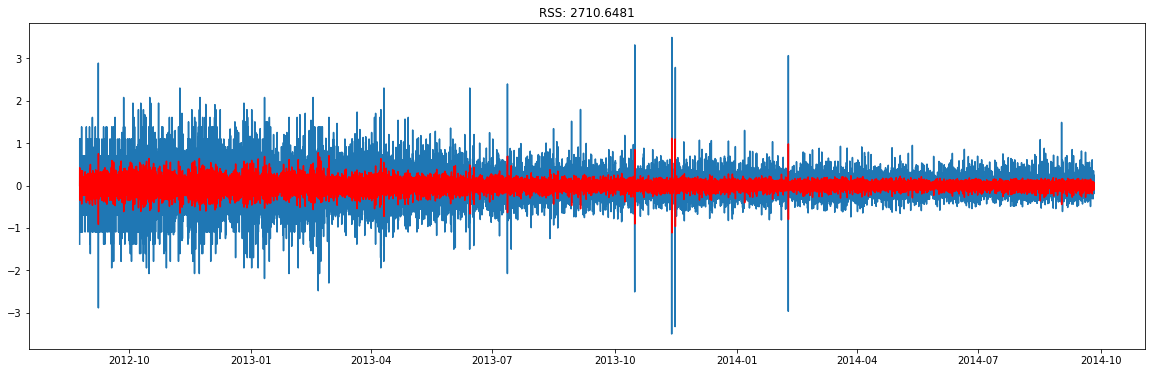

In [62]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\Shrey\Anaconda2\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Shrey\Anaconda2\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 2528.4698')

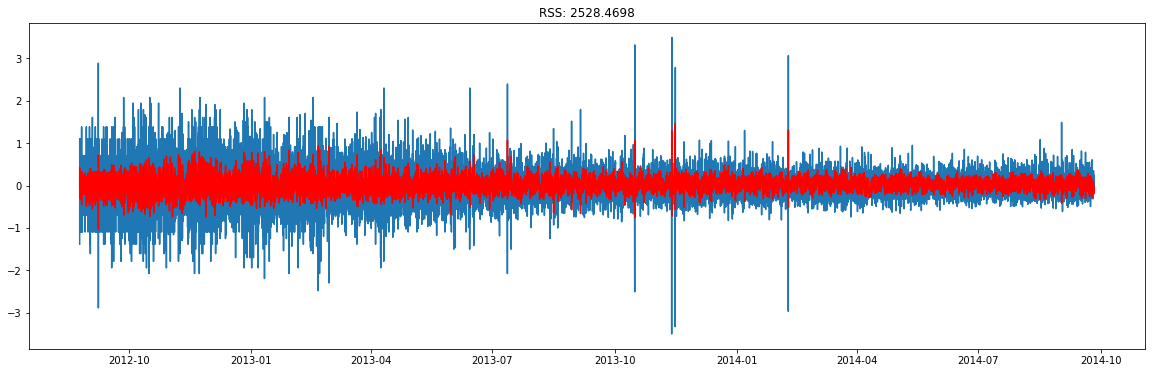

In [71]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [80]:
start_index = '2014-09-25 23:00:00'
end_index = '2014-12-25 23:00:00'
pred_val = results_ARIMA.predict(start=start_index, end=end_index)

In [82]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Datetime
2012-08-25 01:00:00    0.000278
2012-08-25 02:00:00    0.420317
2012-08-25 03:00:00   -0.267649
2012-08-25 04:00:00    0.364020
2012-08-25 05:00:00    0.088419
dtype: float64


In [84]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Datetime
2012-08-25 01:00:00    0.000278
2012-08-25 02:00:00    0.420595
2012-08-25 03:00:00    0.152946
2012-08-25 04:00:00    0.516966
2012-08-25 05:00:00    0.605385
dtype: float64


In [85]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\Shrey\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Datetime
2012-08-25 00:00:00    2.079442
2012-08-25 01:00:00    2.079720
2012-08-25 02:00:00    2.500036
2012-08-25 03:00:00    2.232387
2012-08-25 04:00:00    2.596407
dtype: float64

Text(0.5,1,'RMSE: 182093.1021')

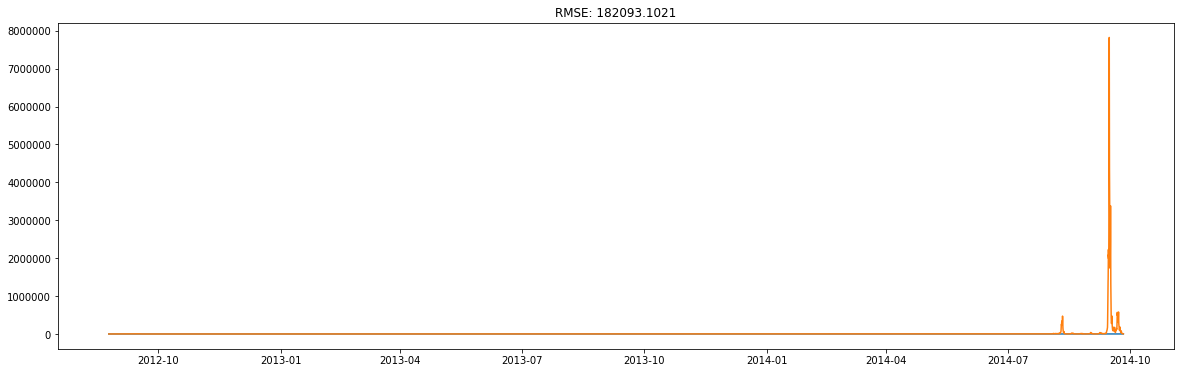

In [87]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))